In [59]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
DATA_DIR = '../data/'
EL_CAMPO = paste(DATA_DIR, 'elcampoTX_2007_2015.csv', sep='')

In [4]:
daily = read.csv(EL_CAMPO)
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN,TOBS
USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,1/1/07,0.00,63,37,37
USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,1/2/07,0.00,55,36,37
USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,1/3/07,0.00,55,37,47
USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,1/4/07,1.48,54,47,49
USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,1/5/07,0.05,57,46,55
USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,1/6/07,0.00,71,54,60


In [15]:
daily$DATE <- as.Date(daily$DATE, format='%m/%d/%y')
daily <- daily[complete.cases(daily), ]
daily <- daily[order(daily$DATE), ]
head(daily)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN,TOBS
1,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-01,0.00,63,37,37
2,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-02,0.00,55,36,37
6471,USC00417020,"PIERCE 1 E, TX US",29.2353,-96.1816,32.0,2007-01-02,0.00,55,37,46
3,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-03,0.00,55,37,47
6472,USC00417020,"PIERCE 1 E, TX US",29.2353,-96.1816,32.0,2007-01-03,0.10,53,39,46
4,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-04,1.48,54,47,49


In [83]:
daily$YEAR <- as.numeric(format(daily$DATE, '%Y'))
daily$MONTH <- as.numeric(format(daily$DATE, '%m'))
daily$YDAY <- yday(daily$DATE)
daily$YEAR_MONTH <- paste(daily$YEAR, daily$MONTH, sep='_')
head(daily)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN,TOBS,YEAR,MONTH,YEAR_MONTH,monthly_means,YDAY
1,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-01,0.00,63,37,37,2007,1,2007_1,46.04348,1
2,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-02,0.00,55,36,37,2007,1,2007_1,46.04348,2
6471,USC00417020,"PIERCE 1 E, TX US",29.2353,-96.1816,32.0,2007-01-02,0.00,55,37,46,2007,1,2007_1,46.04348,2
3,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-03,0.00,55,37,47,2007,1,2007_1,46.04348,3
6472,USC00417020,"PIERCE 1 E, TX US",29.2353,-96.1816,32.0,2007-01-03,0.10,53,39,46,2007,1,2007_1,46.04348,3
4,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-04,1.48,54,47,49,2007,1,2007_1,46.04348,4


In [84]:
monthly.means <- tapply(daily$TOBS, daily$YEAR_MONTH, mean)

In [85]:
daily$monthly.means <- monthly.means[daily$YEAR_MONTH]
head(daily)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN,TOBS,YEAR,MONTH,YEAR_MONTH,monthly_means,YDAY
1,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-01,0.00,63,37,37,2007,1,2007_1,46.04348,1
2,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-02,0.00,55,36,37,2007,1,2007_1,46.04348,2
6471,USC00417020,"PIERCE 1 E, TX US",29.2353,-96.1816,32.0,2007-01-02,0.00,55,37,46,2007,1,2007_1,46.04348,2
3,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-03,0.00,55,37,47,2007,1,2007_1,46.04348,3
6472,USC00417020,"PIERCE 1 E, TX US",29.2353,-96.1816,32.0,2007-01-03,0.10,53,39,46,2007,1,2007_1,46.04348,3
4,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2007-01-04,1.48,54,47,49,2007,1,2007_1,46.04348,4


In [110]:
daily$prev.monthly.means <- c(rep(NA, 2*365), daily$monthly.means[1:(dim(daily)[1] - 2*365)])

In [112]:
tail(daily)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN,TOBS,YEAR,MONTH,YEAR_MONTH,monthly_means,YDAY,PREV_YEAR_MONTH,prev.monthly.means
3249,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2015-12-29,0.00,53,38,39,2015,12,2015_12,53.40984,363,2015_11,53.19672
6467,USC00412786,"EL CAMPO, TX US",29.2000,-96.2654,33.5,2015-12-29,0.00,51,38,39,2015,12,2015_12,53.40984,363,2015_11,53.19672
3250,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2015-12-30,0.02,53,39,49,2015,12,2015_12,53.40984,364,2015_11,53.19672
6468,USC00412786,"EL CAMPO, TX US",29.2000,-96.2654,33.5,2015-12-30,0.08,52,39,48,2015,12,2015_12,53.40984,364,2015_11,53.19672
3251,USC00412266,"DANEVANG 1 W, TX US",29.0567,-96.2319,21.3,2015-12-31,0.03,54,48,48,2015,12,2015_12,53.40984,365,2015_11,53.19672
6469,USC00412786,"EL CAMPO, TX US",29.2000,-96.2654,33.5,2015-12-31,0.00,53,47,47,2015,12,2015_12,53.40984,365,2015_11,53.19672


In [127]:
mod1 <- lm(TOBS ~ as.factor(MONTH) + monthly_means + prev.monthly.means + YDAY + I(YDAY^2), data=daily)
summary(mod1)


Call:
lm(formula = TOBS ~ as.factor(MONTH) + monthly_means + prev.monthly.means + 
    YDAY + I(YDAY^2), data = daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.8688  -4.2680   0.2052   4.8960  26.5152 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.351e+00  2.146e+00  -2.494   0.0127 *  
as.factor(MONTH)2  -9.196e+00  7.523e-01 -12.223  < 2e-16 ***
as.factor(MONTH)3  -1.683e+01  1.207e+00 -13.936  < 2e-16 ***
as.factor(MONTH)4  -2.319e+01  1.697e+00 -13.669  < 2e-16 ***
as.factor(MONTH)5  -2.794e+01  2.107e+00 -13.257  < 2e-16 ***
as.factor(MONTH)6  -3.111e+01  2.462e+00 -12.635  < 2e-16 ***
as.factor(MONTH)7  -3.274e+01  2.699e+00 -12.132  < 2e-16 ***
as.factor(MONTH)8  -3.277e+01  2.907e+00 -11.272  < 2e-16 ***
as.factor(MONTH)9  -3.123e+01  3.045e+00 -10.259  < 2e-16 ***
as.factor(MONTH)10 -2.820e+01  3.161e+00  -8.923  < 2e-16 ***
as.factor(MONTH)11 -2.353e+01  3.341e+00  -7.042 2.07e-12 ***
as.factor(MONTH)1

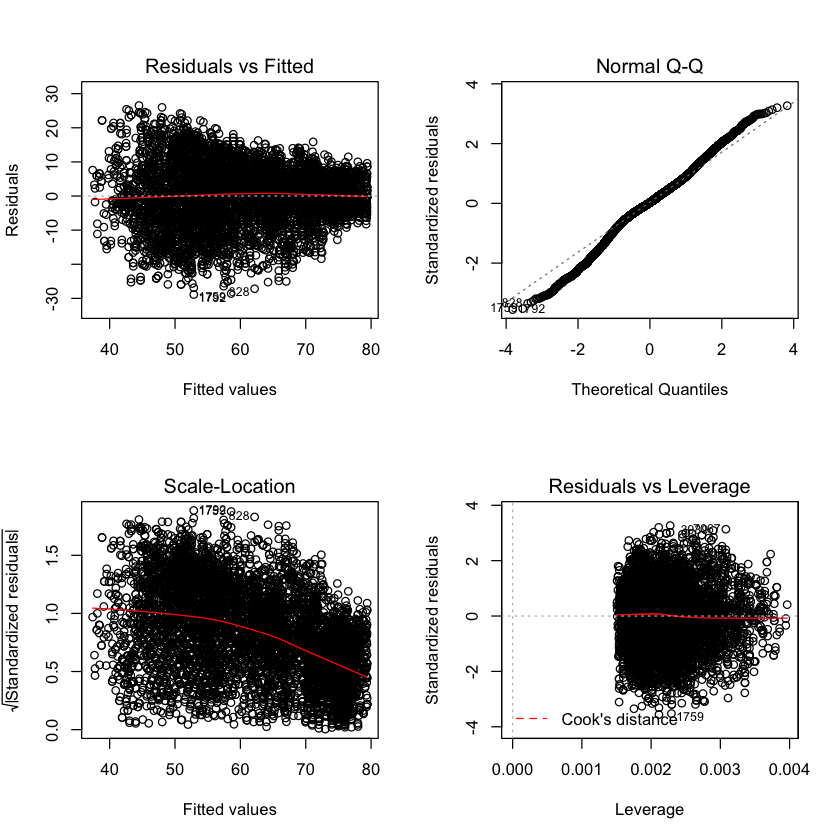

In [128]:
par(mfrow=c(2, 2))
plot(mod1)

In [129]:
quantile(resid(mod1), probs=c(0.025, 0.25, 0.5, 0.75, 0.975), na.rm=T)

2.5%         25%         50%         75%       97.5% 
-17.6304928  -4.2680074   0.2051827   4.8960105  16.1708227

In [130]:
preds <- predict(mod1)
preds[1:10]

3536     6745      304     3537     6746      305     3538     6747 
63.12124 63.12124 62.96756 62.96756 62.96756 59.86176 59.86176 59.86176 
     306     3539 
59.70467 59.70467

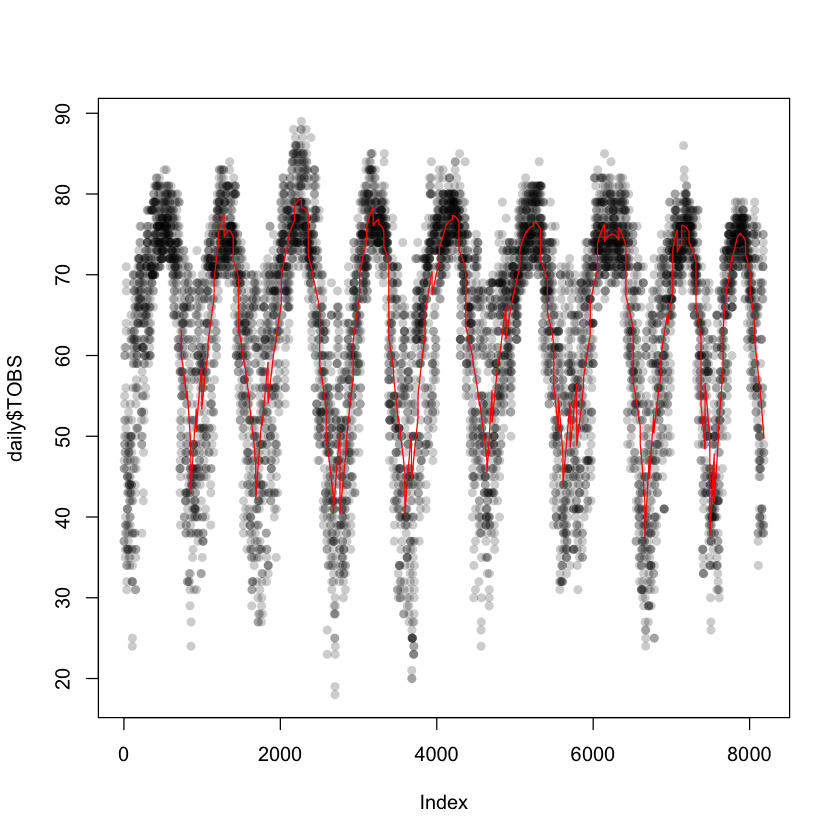

In [131]:
plot(daily$TOBS, pch=16, col=rgb(0, 0, 0, 0.2))
lines(c(rep(NA, 2*365), preds), col=2)

In [138]:
fit.resid <- cbind(mod1$fitted, mod1$resid)
head(fit.resid)

3536,63.12124,-13.121237
6745,63.12124,0.878763
304,62.96756,-10.967559
3537,62.96756,-9.967559
6746,62.96756,4.032441
305,59.86176,-4.861762


In [150]:
get.pseudo.error <- function(predicted.value) {
  range.min <- predicted.value - 2.5
  range.max <- predicted.value + 2.5
  samp <- fit.resid[fit.resid[, 1] >= range.min & fit.resid[, 1] <= range.max, 2]
  predicted.value + sample(samp, 1)
}

In [166]:
get.pseudo.error(60)

3682 
45.51185

In [153]:
pseudo.errors <- lapply(preds, get.pseudo.error)

In [173]:
xv <- 1:length(pseudo.errors)

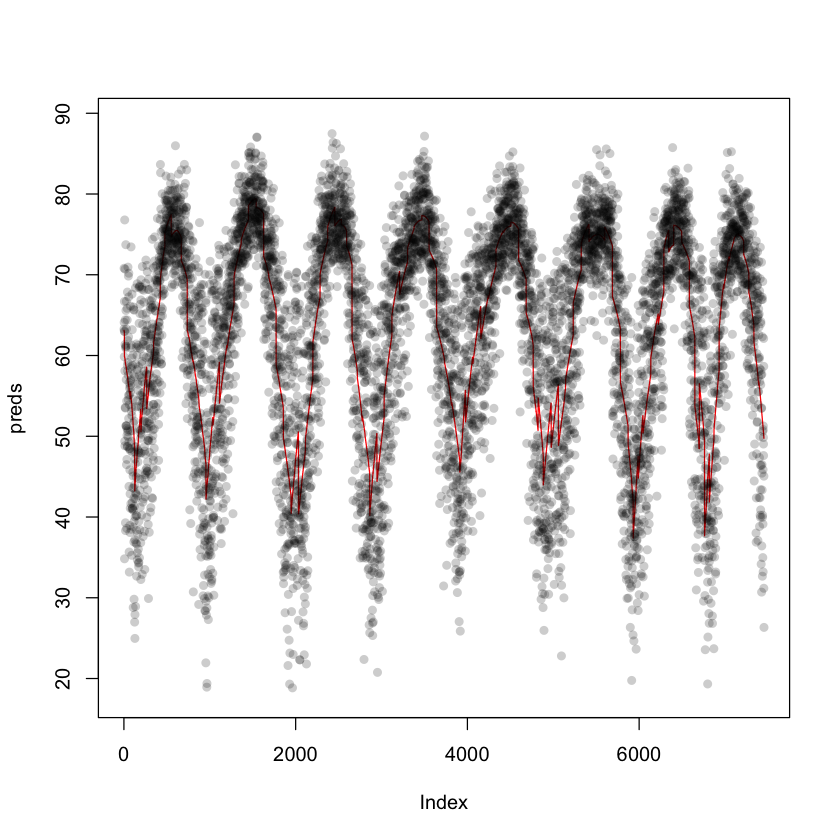

In [177]:
plot(preds, type='l', col=2, ylim=range(daily$TOBS, na.rm=T))
points(xv, unlist(pseudo.errors), pch=16, col=rgb(0, 0, 0, 0.2))